In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from qmplot import manhattanplot
import pickle
import numpy as np

In [2]:
pathToUKBAnalysis = "/mnt/disks/local_ancestry_analysis/ukb_tractor_analysis/"
tractorStep2Res = pathToUKBAnalysis + "tractor_step2_results/"
tractorStep3Res = pathToUKBAnalysis + "tractor_step3_results/" 
tractorResultsFile = "ukb_hap_chr19_v2_admixed_final_ancestry_tractor_gwas_results.txt"
plinkResultsFile = "ukb_hap_chr19_v2_admixed_final_assoc_stats.LDL.glm.linear"

In [7]:
## Sanity check: output from Tractor Step 2

# Check dosage values of European-specific ancestral alleles
eur_dosage = pd.read_table(tractorStep2Res + 
                           "ukb_hap_chr19_v2_admixed_final.anc1.dosage.txt", delim_whitespace=True)

dose_check = []
for sample_id in eur_dosage.columns[5:]:
    dosage_data = eur_dosage[sample_id]
    # Get the count of Zeros in column 
    num_ref = (dosage_data == 0).sum()
    dose_check.append(num_ref == eur_dosage.shape[0])
print("EUR: ", all(dose_check))

# Check dosage values of African-specific ancestral alleles
afr_dosage = pd.read_table(tractorStep2Res + 
                           "ukb_hap_chr19_v2_admixed_final.anc0.dosage.txt", delim_whitespace=True)

dose_check = []
for sample_id in afr_dosage.columns[5:]:
    dosage_data = afr_dosage[sample_id]
    # Get the count of Zeros in column 
    num_ref = (dosage_data == 0).sum()
    dose_check.append(num_ref == afr_dosage.shape[0])

print("AFR: ", all(dose_check))

EUR:  False
AFR:  False


In [12]:
tractor_results = pd.read_table(tractorStep3Res + tractorResultsFile,
                                delim_whitespace=True, usecols=["CHROM", "POS", "ID", "AF_anc0", "AF_anc1", 
                                                                "LAprop_anc0", "LAprop_anc1",
                                                                "Gpval_anc0", "Gpval_anc1"])
print(tractor_results.shape)
print(tractor_results.isna().sum())

(18900, 9)
CHROM             0
POS               0
ID                0
AF_anc0           0
AF_anc1           0
LAprop_anc0       0
LAprop_anc1       0
Gpval_anc0     9657
Gpval_anc1     9657
dtype: int64


In [13]:
tractor_results.head(10)
# print(tractor_results_afr_eur_only[tractor_results_afr_eur_only['LAprop_anc3'] > 0.0 | tractor_results_afr_eur_only['AF_anc3'] != np.nan])

,CHROM,POS,ID,AF_anc0,AF_anc1,LAprop_anc0,LAprop_anc1,Gpval_anc0,Gpval_anc1
0,19,601373,rs12461820,0.47619,0.19355,0.40385,0.59615,0.832548,0.831979
1,19,603769,rs55659726,0.14286,0.16129,0.40385,0.59615,0.383689,0.453583
2,19,605985,rs7255568,0.57143,0.54839,0.40385,0.59615,0.634814,0.957581
3,19,606021,rs7252617,0.23810,0.16129,0.40385,0.59615,0.522791,0.716014
4,19,606045,rs62132629,0.04762,0.00000,0.40385,0.59615,NaN,NaN
5,19,607637,rs76205922,0.00000,0.03226,0.40385,0.59615,NaN,NaN
6,19,607825,rs11878713,0.23810,0.22581,0.40385,0.59615,0.320681,0.767288
7,19,607984,Affx-16106365,0.09524,0.00000,0.40385,0.59615,NaN,NaN
8,19,608668,rs12974196,0.00000,0.19355,0.40385,0.59615,NaN,NaN
9,19,614967,rs11669519,0.61905,0.22581,0.40385,0.59615,0.536540,0.570933


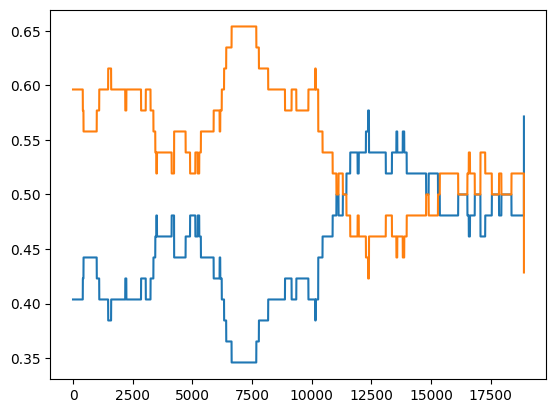

In [14]:
plt.plot(tractor_results['LAprop_anc0'])
plt.plot(tractor_results['LAprop_anc1'])

(18900, 4)
(9243, 4)


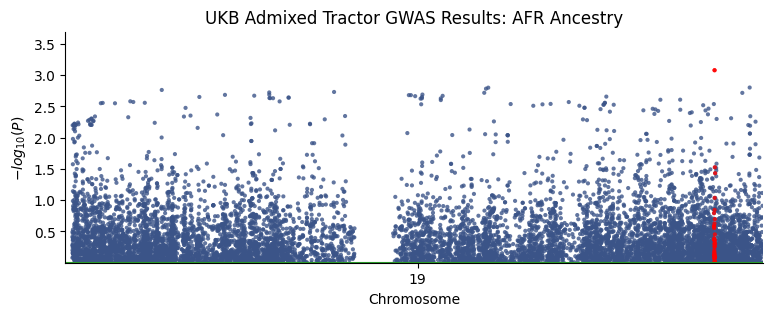

In [9]:
# AFR-specific GWAS 
afr_results = pd.read_table(tractorStep3Res + tractorResultsFile, delim_whitespace=True, usecols=["CHROM", "POS", "ID", "Gpval_anc0"])
print(afr_results.shape)
afr_results.rename(columns={"CHROM": "#CHROM", "Gpval_anc0":"P"}, inplace=True)
afr_results = afr_results.dropna(how="any", axis=0)
print(afr_results.shape)


ax = manhattanplot(data=afr_results,
                   title="UKB Admixed Tractor GWAS Results: AFR Ancestry",
                  xlabel="Chromosome",
                  ylabel=r"$-log_{10}{(P)}$",
                   genomewideline=True,
                sign_marker_p=1e-3,
#                   is_annotate_topsnp=True
                  )

(18900, 4)
(9243, 4)


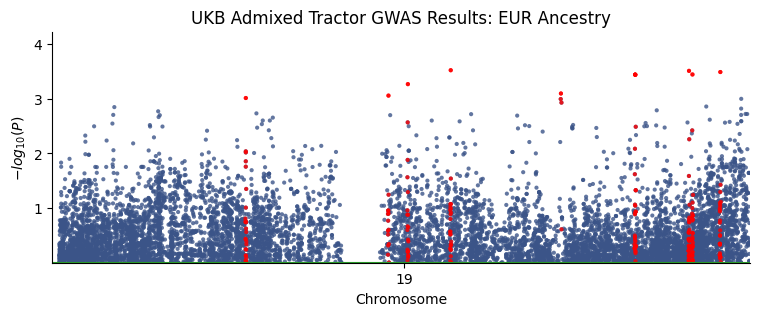

In [14]:
# EUR-specific GWAS 
afr_results = pd.read_table(tractorStep3Res + tractorResultsFile, delim_whitespace=True, usecols=["CHROM", "POS", "ID", "Gpval_anc1"])
print(afr_results.shape)
afr_results.rename(columns={"CHROM": "#CHROM", "Gpval_anc1":"P"}, inplace=True)
afr_results = afr_results.dropna(how="any", axis=0)
print(afr_results.shape)

ax = manhattanplot(data=afr_results,
                   title="UKB Admixed Tractor GWAS Results: EUR Ancestry",
                  xlabel="Chromosome",
                  ylabel=r"$-log_{10}{(P)}$",  # Turn off suggestiveline
#                    genomewideline=None,  # Turn off genomewideline
                   #xticklabel_kws={"rotation": "vertical"}
                    genomewideline=True,
                sign_marker_p=1e-3,
                  )

(18926, 4)


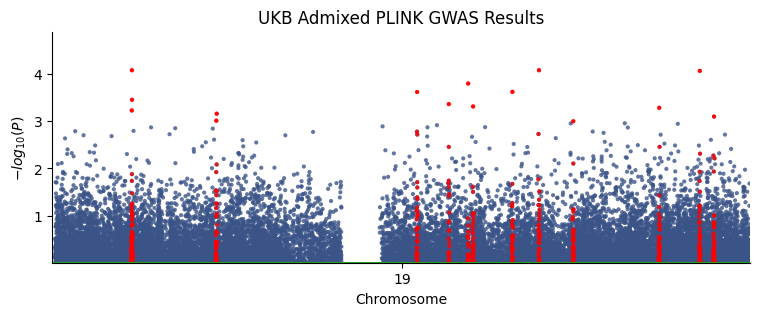

In [16]:
# Admixed GWAS (not deconvolved)
plink_results = pd.read_table(pathToUKBAnalysis + plinkResultsFile, delim_whitespace=True, usecols=["#CHROM", "POS", "ID", "P"])

plink_results = plink_results.dropna(how="any", axis=0)
print(plink_results.shape)

ax = manhattanplot(data=plink_results,
                   title="UKB Admixed PLINK GWAS Results",
                  xlabel="Chromosome",
                  ylabel=r"$-log_{10}{(P)}$",
                    genomewideline=True,
                sign_marker_p=1e-3,
                  )

In [26]:
## Check RFMix results --> at representation of AFR + EUR admixture in these individuals
# Read in RFMix results for admixed cohort (rfmix results from matteo with sample id match + admixed sample selection)
with open(pathToUKBAnalysis + "rfmixResults_admixedAfricanOnly.pkl", 'rb') as f:
    rfmixResults_admixedAfricanOnly  = pickle.load(f)
# Generate counts of haplotypes inherited from each ancestral population
numberOfBins = len(rfmixResults_admixedAfricanOnly)
individual_ancestry_counts = {}
individual_ancestry_groups = {}
for binIndex in range(numberOfBins): #(numberOfBins)
    rfmixRes = rfmixResults_admixedAfricanOnly[binIndex]
#     print(rfmixRes.shape)
    haplotypes = rfmixRes.columns[6:]
    # look at ancestral breakdown for each individual
    for haplotype in haplotypes:
        sample_id = haplotype.split("_")[0]
        if sample_id in individual_ancestry_counts:
            individual_ancestry_counts[sample_id] += rfmixRes[haplotype].value_counts()
        else:
            individual_ancestry_counts[sample_id] = rfmixRes[haplotype].value_counts()
            
        if sample_id in individual_ancestry_groups:
            groups = individual_ancestry_groups[sample_id]
            individual_ancestry_groups[sample_id] =  groups.union(set(rfmixRes[haplotype].unique())) 
        else:
            individual_ancestry_groups[sample_id] = set(rfmixRes[haplotype].unique())

In [10]:
# print(len(individual_ancestry_groups), len(individual_ancestry_counts))
eur_code = 3
afr_code = 0
amr_code = 1
sas_code = 4 # should not appear
eas_code = 2 # should not appear


samples_with_afr_eur_inherited_tracts = []
samples_with_afr_only_inherited_tracts = []
samples_with_eur_only_inherited_tracts = []
samples_with_amr_inherited_tracts = []
samples_with_sas_inherited_tracts = []
samples_with_eas_inherited_tracts = []
samples_with_missing = []

for sample_id, ancestry_groups in individual_ancestry_groups.items():
    if set([0,3]) == ancestry_groups:
        samples_with_afr_eur_inherited_tracts.append(sample_id)
    
    if set([0]) == ancestry_groups:
        samples_with_afr_only_inherited_tracts.append(sample_id)
        
    if set([3]) == ancestry_groups:
        samples_with_eur_only_inherited_tracts.append(sample_id)
    
    if amr_code in ancestry_groups:
        samples_with_amr_inherited_tracts.append(sample_id)
    if sas_code in ancestry_groups:
        samples_with_sas_inherited_tracts.append(sample_id)
    if amr_code in ancestry_groups:
        samples_with_eas_inherited_tracts.append(sample_id)
    if -1 in ancestry_groups:
        samples_with_missing.append(sample_id)
    
        
print("AFR + EUR: ", len(samples_with_afr_eur_inherited_tracts))
print("AFR only: ", len(samples_with_afr_only_inherited_tracts))
print("EUR only: ", len(samples_with_eur_only_inherited_tracts))
print(" w/AMR: ", len(samples_with_amr_inherited_tracts))
print(" w/SAS: ", len(samples_with_sas_inherited_tracts))
print(" w/EAS: ", len(samples_with_eas_inherited_tracts))
print(" w/ missing: ", len(samples_with_missing))

AFR + EUR:  136
AFR only:  2670
EUR only:  2
 w/AMR:  124
 w/SAS:  86
 w/EAS:  124
 w/ missing:  0


In [11]:
with open('samples_with_afr_eur_inherited_tracts.pkl', 'wb') as f:
    pickle.dump(samples_with_afr_eur_inherited_tracts, f)
with open('samples_with_afr_only_inherited_tracts.pkl', 'wb') as f:
    pickle.dump(samples_with_afr_eur_inherited_tracts, f)
with open('samples_with_eur_inherited_tracts.pkl', 'wb') as f:
    pickle.dump(samples_with_afr_eur_inherited_tracts, f)

In [28]:
## Check RFMix results --> at representation of AFR + EUR admixture in these individuals
# Read in RFMix results for admixed cohort (rfmix results from matteo with sample id match + admixed sample selection)

rfmixResults_tractorIn = pd.read_csv(pathToUKBAnalysis + "pca.chr19.ukb_hap_admixed.mine.msp.tsv", sep="\t",
                               skiprows=1) # File that is directly passed into Tractor Step2

In [30]:
# Generate counts of haplotypes inherited from each ancestral population
individual_ancestry_counts = {}
individual_ancestry_groups = {}

haplotypes = rfmixResults_tractorIn.columns[6:]
# look at ancestral breakdown for each individual
for haplotype in haplotypes:
    sample_id = haplotype.split("_")[0]
    if sample_id in individual_ancestry_counts:
        individual_ancestry_counts[sample_id] += rfmixResults_tractorIn[haplotype].value_counts()
    else:
        individual_ancestry_counts[sample_id] = rfmixResults_tractorIn[haplotype].value_counts()

    if sample_id in individual_ancestry_groups:
        groups = individual_ancestry_groups[sample_id]
        individual_ancestry_groups[sample_id] =  groups.union(set(rfmixResults_tractorIn[haplotype].unique())) 
    else:
        individual_ancestry_groups[sample_id] = set(rfmixResults_tractorIn[haplotype].unique())

# print(len(individual_ancestry_groups), len(individual_ancestry_counts))
eur_code = 3
afr_code = 0
amr_code = 1
sas_code = 4 # should not appear
eas_code = 2 # should not appear


samples_with_afr_eur_inherited_tracts = []
samples_with_afr_only_inherited_tracts = []
samples_with_eur_only_inherited_tracts = []
samples_with_amr_inherited_tracts = []
samples_with_sas_inherited_tracts = []
samples_with_eas_inherited_tracts = []
samples_with_missing = []

for sample_id, ancestry_groups in individual_ancestry_groups.items():
    if set([-1, 0,3]) == ancestry_groups:
        samples_with_afr_eur_inherited_tracts.append(sample_id)
    
    if set([-1, 0]) == ancestry_groups:
        samples_with_afr_only_inherited_tracts.append(sample_id)
        
    if set([-1, 3]) == ancestry_groups:
        samples_with_eur_only_inherited_tracts.append(sample_id)
    
    if amr_code in ancestry_groups:
        samples_with_amr_inherited_tracts.append(sample_id)
    if sas_code in ancestry_groups:
        samples_with_sas_inherited_tracts.append(sample_id)
    if amr_code in ancestry_groups:
        samples_with_eas_inherited_tracts.append(sample_id)
    if -1 in ancestry_groups:
        samples_with_missing.append(sample_id)
    
        
print("AFR + EUR: ", len(samples_with_afr_eur_inherited_tracts))
print("AFR only: ", len(samples_with_afr_only_inherited_tracts))
print("EUR only: ", len(samples_with_eur_only_inherited_tracts))
print(" w/AMR: ", len(samples_with_amr_inherited_tracts))
print(" w/SAS: ", len(samples_with_sas_inherited_tracts))
print(" w/EAS: ", len(samples_with_eas_inherited_tracts))
print(" w/ missing: ", len(samples_with_missing))

AFR + EUR:  136
AFR only:  2670
EUR only:  2
 w/AMR:  124
 w/SAS:  86
 w/EAS:  124
 w/ missing:  2982


In [35]:
EUR_samples = samples_with_afr_eur_inherited_tracts + samples_with_eur_only_inherited_tracts
EUR_samples_vcf = [sample_id + "_" + sample_id for sample_id in EUR_samples]

# Check genotypes @ MSP sites for these individuals
admixed_geno = pd.read_csv(pathToUKBAnalysis + "ukb_hap_chr19_v2_admixed_final.vcf", delim_whitespace=True, skiprows = 5, 
                          usecols = ['POS'] + EUR_samples_vcf)
print(admixed_geno.iloc[:3, :5])

      POS 3474123_3474123 3240990_3240990 3370173_3370173 3742894_3742894
0  260137             0|0             0|0             0|0             0|0
1  260970             1|1             1|0             1|0             1|1
2  267039             1|1             1|0             1|0             1|1


In [47]:
EUR_samples_rfmix = []
for sample_id in EUR_samples:
    EUR_samples_rfmix.append(sample_id + "_" + sample_id + ".0")
    EUR_samples_rfmix.append(sample_id + "_" + sample_id + ".1")
print(EUR_samples_rfmix[:4])

cols_to_read = ['spos', 'epos'] + EUR_samples_rfmix
rfmix_eur_samples = rfmixResults_tractorIn[cols_to_read]
rfmix_eur_samples.iloc[:3, :6]

['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0', '3240990_3240990.1']


,spos,epos,3474123_3474123.0,3474123_3474123.1,3240990_3240990.0,3240990_3240990.1
0,601373,768721,-1,-1,-1,-1
1,768721,849618,-1,-1,-1,-1
2,849618,1090803,-1,-1,-1,-1


In [48]:
print(EUR_samples[:4])
print(EUR_samples_rfmix[:4])
print(EUR_samples_vcf[:8])

print(rfmix_eur_samples.shape)
print(admixed_geno.shape)

['3474123', '3240990', '3370173', '3742894']
['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0', '3240990_3240990.1']
['3474123_3474123', '3240990_3240990', '3370173_3370173', '3742894_3742894', '5665321_5665321', '4947254_4947254', '5302892_5302892', '1309336_1309336']
(20228, 278)
(19139, 139)


In [49]:
with open(pathToUKBAnalysis + 'rfmix_eur_samples.pkl', 'wb') as f:
    pickle.dump(rfmix_eur_samples, f)
with open(pathToUKBAnalysis + 'admixed_geno.pkl', 'wb') as f:
    pickle.dump(admixed_geno, f)

In [5]:
with open(pathToUKBAnalysis + 'rfmix_eur_samples.pkl', 'rb') as f:
    rfmix_eur_samples  = pickle.load(f)
with open(pathToUKBAnalysis + 'admixed_geno.pkl', 'rb') as f:
    admixed_geno = pickle.load(f)
    

print(rfmix_eur_samples.shape)
print(admixed_geno.shape)

(20228, 278)
(19139, 139)


In [30]:
# Select msp_windows where EUR ancestry shows up in any column
rfmix_eur_samples = rfmix_eur_samples[rfmix_eur_samples.isin([3]).any(axis=1)]
print(rfmix_eur_samples.shape)

(8145, 278)


In [32]:
EUR_samples_rfmix = rfmix_eur_samples.columns[2:]
# print(EUR_samples_rfmix)

EUR_samples_vcf = admixed_geno.columns[1:]
# print(EUR_samples_vcf)

dosage_zero_flag = True
for _, msp_window in rfmix_eur_samples.iterrows():
    spos = msp_window['spos']
    epos = msp_window['epos']
    
    current_lai_calls = []
    current_eur_indices = []
    for _, snp in admixed_geno.iterrows():
        snp_pos = snp['POS']
        if spos <= snp_pos < epos:
            # MSP window: get genotypes of LAI calls corresponding to EUR ancestry
            if len(current_lai_calls) == 0:
                current_lai_calls = np.array(msp_window[EUR_samples_rfmix].values.tolist())
                eur_indices = np.where(current_lai_calls == 3)[0]
            
            # Else in same window, use existing calls
            # Get genotypes for all indviduals at this SNP
            genos = snp[EUR_samples_vcf].values.tolist() # ['0|1', '0|0']
            genos = np.array([geno.split('|') for geno in genos])
            genos = genos.flatten()
            genos = np.array([int(geno) for geno in genos])
            
            genos_eur = genos[eur_indices]
            if set(genos_eur) != set([0]):
                dosage_zero_flag = False
                # Get sample_id of exception
                risk_alle_indices = np.where(genos_eur == 1)[0]
                print("Exception found: ", snp_pos, EUR_samples_rfmix[risk_alle_indices])
            
            # Select dosage values for EUR_lai calls and check they are all zero (ie no risk alleles inherited)
            
            
        else:
            continue

Exception found:  23086017 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23091911 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23123102 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23127435 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23128203 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23284350 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23353326 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23370420 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23526022 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23669375 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23705539 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23705776 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23831782 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23837365 Index(['3474123_3474123.0'], dtype='o

Exception found:  29402035 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29409510 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29420446 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29423609 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29480853 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29490697 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29501786 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29504552 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29505798 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29515771 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29518869 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29525308 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29545730 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29568915 Index(['3474123_3474123.0'], dtype='o

Exception found:  31240705 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31261801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31280051 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31323219 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31336779 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31358049 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31363298 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31377262 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31569303 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31571547 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31635312 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31651321 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31692062 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31738241 Index(['3474123_3474123.0'], dtype='o

Exception found:  33705455 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33706293 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33708902 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33711686 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33713928 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33719750 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33732762 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33750314 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33753555 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33759348 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33764718 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33772816 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33776212 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33777658 Index(['3474123_3474123.0'], dtype='o

Exception found:  35555190 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35555585 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35557923 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35575164 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35575767 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35577870 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35587791 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35604873 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35605939 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35610994 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35612159 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35615179 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35622695 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35633635 Index(['3474123_3474123.0'], dtype='o

Exception found:  770528 Index(['3474123_3474123.0'], dtype='object')
Exception found:  789227 Index(['3474123_3474123.0'], dtype='object')
Exception found:  858376 Index(['3474123_3474123.0'], dtype='object')
Exception found:  876641 Index(['3474123_3474123.0'], dtype='object')
Exception found:  899123 Index(['3474123_3474123.0'], dtype='object')
Exception found:  903120 Index(['3474123_3474123.0'], dtype='object')
Exception found:  910742 Index(['3474123_3474123.0'], dtype='object')
Exception found:  912852 Index(['3474123_3474123.0'], dtype='object')
Exception found:  917874 Index(['3474123_3474123.0'], dtype='object')
Exception found:  923744 Index(['3474123_3474123.0'], dtype='object')
Exception found:  924245 Index(['3474123_3474123.0'], dtype='object')
Exception found:  931523 Index(['3474123_3474123.0'], dtype='object')
Exception found:  962161 Index(['3474123_3474123.0'], dtype='object')
Exception found:  964434 Index(['3474123_3474123.0'], dtype='object')
Exception found:  96

Exception found:  2115790 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2138041 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2146852 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2170954 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2173136 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2191980 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2194896 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2195065 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2196783 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2198240 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2206575 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2226676 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2238667 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2242829 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  8901112 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8920984 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8921033 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8922721 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8925231 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8941717 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8942523 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8953922 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8961981 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8972996 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8975083 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8981400 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8988994 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8989345 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  10634264 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10664632 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10670184 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10676681 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10678842 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10693943 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10701833 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10728030 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10728320 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10739594 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10742170 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10754905 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10794630 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10813364 Index(['3474123_3474123.0'], dtype='o

Exception found:  13319314 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13321122 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13325733 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13353722 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13355068 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13383313 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13389377 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13392333 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13395726 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13403754 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13406735 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13411482 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13429114 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13434717 Index(['3474123_3474123.0'], dtype='o

Exception found:  15194493 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15196636 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15198292 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15198507 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15198631 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15205503 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15212304 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15227798 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15248549 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15268533 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15271771 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15277027 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15295134 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15298270 Index(['3474123_3474123.0'], dtype='o

Exception found:  16842052 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16842740 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16843701 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16855265 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16860105 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16868884 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16869466 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16876099 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16900878 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16918485 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16953880 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17001551 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17003789 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17019907 Index(['3474123_3474123.0'], dtype='o

Exception found:  18589943 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18633437 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18650278 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18707048 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18733355 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18759279 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18763596 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18780917 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18782377 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18803172 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18829733 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18847832 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18847921 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18876309 Index(['3474123_3474123.0'], dtype='o

Exception found:  22100319 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22102503 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22130311 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22158299 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22306448 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22425239 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22450922 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22521619 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22600624 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22613229 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22671000 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22730500 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22798508 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23086017 Index(['3474123_3474123.0'], dtype='o

Exception found:  29396344 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29402035 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29420446 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29423609 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29475815 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29480853 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29490697 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29496714 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29501786 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29504552 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29505798 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29508489 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29572039 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29583826 Index(['3474123_3474123.0'], dtype='o

Exception found:  31238357 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31261801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31296081 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31317393 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31323219 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31326553 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31336779 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31377831 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31392777 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31434053 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31493818 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31646806 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31648664 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31668216 Index(['3474123_3474123.0'], dtype='o

Exception found:  33777658 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33780575 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33786749 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33789397 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33803443 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33818385 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33832285 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33868013 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33873371 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33874354 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33874758 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33878039 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33884341 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33887160 Index(['3474123_3474123.0'], dtype='o

Exception found:  35645915 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35652709 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35660508 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35660752 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35669071 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35696724 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35700047 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35718938 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35719020 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35719106 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35719257 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35720776 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35756178 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35772471 Index(['3474123_3474123.0'], dtype='o

Exception found:  37395957 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37407938 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37437106 Index(['3474123_3474123.0'], dtype='object')
Exception found:  37441980 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37455903 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37464606 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37472171 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37482151 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37487632 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37487723 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37487873 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37488055 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37579810 Index(['3474123_3474123.1'], dtype='object')
Exception found:  37593096 Index(['3474123_3474123.1'], dtype='o

Exception found:  39768358 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39789115 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39808695 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39815852 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39819802 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39862881 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  39885812 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  39886177 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39899177 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39901611 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39913634 Index(['3474123_3474123.1'], dtype='object')
Exception found:  39914748 Index(['3474123_3474123.1'], dtype='object')
Exception found:  39915758 Index(['3474123_3474123.1'], dtype='object')
Exception found:  3991

Exception found:  41328365 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41336556 Index(['3474123_3474123.1'], dtype='object')
Exception found:  41338988 Index(['3474123_3474123.1'], dtype='object')
Exception found:  41339842 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41341589 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  41343237 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41345395 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41351903 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  41356281 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  41363765 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  41363873 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41363898 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  41383799 Inde

Exception found:  43044329 Index(['3474123_3474123.1'], dtype='object')
Exception found:  43093033 Index(['3474123_3474123.1'], dtype='object')
Exception found:  43208917 Index(['3474123_3474123.1'], dtype='object')
Exception found:  43273795 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43282955 Index(['3474123_3474123.1'], dtype='object')
Exception found:  43308256 Index(['3474123_3474123.1'], dtype='object')
Exception found:  43371484 Index(['3474123_3474123.1'], dtype='object')
Exception found:  43377321 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43415657 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43432017 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  43479892 Index(['3474123_3474123.1'], dtype='object')
Exception found:  43499172 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43499316 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  4351

Exception found:  44889660 Index(['3474123_3474123.1'], dtype='object')
Exception found:  44890801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44899820 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  44900988 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  44901737 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  44905440 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  44906023 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44906110 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  44928885 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  44929633 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  44929828 Index(['3474123_3474123.1'], dtype='object')
Exception found:  44932972 Index(['3474123_3474123.0'], dtype

Exception found:  45736003 Index(['3240990_3240990.0'], dtype='object')
Exception found:  45756763 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  45769181 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  45784197 Index(['3474123_3474123.1'], dtype='object')
Exception found:  45793828 Index(['3474123_3474123.1'], dtype='object')
Exception found:  45802863 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  45810035 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  45816529 Index(['3474123_3474123.1'], dtype='object')
Exception found:  45818527 Index(['3474123_3474123.1'], dtype='object')
Exception found:  45818835 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  45830763 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  45836204 Index(['34741

Exception found:  46506005 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46512298 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  46515961 Index(['3474123_3474123.1'], dtype='object')
Exception found:  46520026 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46528941 Index(['3240990_3240990.0'], dtype='object')
Exception found:  46529918 Index(['3240990_3240990.0'], dtype='object')
Exception found:  46537875 Index(['3240990_3240990.0'], dtype='object')
Exception found:  46546250 Index(['3240990_3240990.0'], dtype='object')
Exception found:  46557851 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46560024 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46562704 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46566881 Index(['34741

Exception found:  47525934 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47529740 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47536166 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47539572 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47543774 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47549791 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47569003 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47571477 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  47581464 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47588325 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47589895 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47592014 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47596131 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47597102 Index(['3474123_

Exception found:  48566037 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  48569709 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  48570915 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  48571072 Index(['3474123_3474123.1'], dtype='object')
Exception found:  48577124 Index(['3474123_3474123.1'], dtype='object')
Exception found:  48578889 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  48583239 Index(['3474123_3474123.1'], dtype='object')
Exception found:  48598823 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48599395 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48601454 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48602948 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48606662 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48608598 Index(['3474123_3474123.0

Exception found:  49416936 Index(['3474123_3474123.1'], dtype='object')
Exception found:  49417658 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  49419267 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  49421829 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  49424247 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  49424925 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  49428154 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  49431942 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  49461211 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49462708 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49464971 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49465726 Index(['3474123_3474123.0'], dtype

Exception found:  51099684 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  51130599 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  51136844 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  51137660 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  51141486 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  51153432 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51158480 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51159571 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51160387 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51161088 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51163834 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51166451 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51176055 Inde

Exception found:  52154905 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52160843 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52165050 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52168094 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52181798 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52184460 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52186634 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52216473 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52218343 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52218958 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52224171 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52240015 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52240156 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52246115 Index(['3474123_3474123.0'], dtype='o

Exception found:  53441061 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53442337 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53450533 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53454789 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53455877 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53465100 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53474321 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53480407 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53480707 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53482629 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53484360 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53490509 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53494855 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53503743 Index(['3474123_3474123.0'], dtype='o

Exception found:  55574907 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55578437 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55585834 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55613104 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55655137 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55715359 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55738425 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55738634 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55739515 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55745682 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55751123 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55800329 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55842765 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55850269 Index(['3474123_3474123.0'], dtype='o

Exception found:  56589690 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56590981 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56593811 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56595717 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56596459 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56598660 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56602374 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56603034 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56608900 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56626448 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56633605 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56644842 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56645250 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56652592 Index(['3474123_3474123.0'], dtype='o

Exception found:  57954628 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57958668 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57961612 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57967049 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57967133 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57980167 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57984096 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57984918 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57985460 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57985566 Index(['3474123_3474123.0'], dtype='object')
Exception found:  58003580 Index(['3474123_3474123.0'], dtype='object')
Exception found:  58003613 Index(['3474123_3474123.0'], dtype='object')
Exception found:  58010642 Index(['3474123_3474123.0'], dtype='object')
Exception found:  58034539 Index(['3474123_3474123.0'], dtype='o

Exception found:  917874 Index(['3474123_3474123.0'], dtype='object')
Exception found:  923744 Index(['3474123_3474123.0'], dtype='object')
Exception found:  924245 Index(['3474123_3474123.0'], dtype='object')
Exception found:  931523 Index(['3474123_3474123.0'], dtype='object')
Exception found:  967584 Index(['3474123_3474123.0'], dtype='object')
Exception found:  971082 Index(['3474123_3474123.0'], dtype='object')
Exception found:  977763 Index(['3474123_3474123.0'], dtype='object')
Exception found:  984533 Index(['3474123_3474123.0'], dtype='object')
Exception found:  984554 Index(['3474123_3474123.0'], dtype='object')
Exception found:  986624 Index(['3474123_3474123.0'], dtype='object')
Exception found:  987366 Index(['3474123_3474123.0'], dtype='object')
Exception found:  990281 Index(['3474123_3474123.0'], dtype='object')
Exception found:  990702 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1038445 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1

Exception found:  2512795 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2514373 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2514565 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2524834 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2532365 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2535560 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2537756 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2538668 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2543621 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2550138 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2550206 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2556958 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2559841 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2564055 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  3318510 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3319781 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3321710 Index(['3474123_3474123.1'], dtype='object')
Exception found:  3326292 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3328734 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3338774 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3340313 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3354956 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3355041 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3358425 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3364188 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3367745 Index(['3474123_3474123.0

Exception found:  4569809 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4576090 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4631334 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4640668 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4640983 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4642579 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4714468 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4717187 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4721991 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4724157 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4769740 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4776218 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4783024 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4796782 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  57430917 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57434566 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57455556 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57456323 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57465041 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57469092 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57477482 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57482904 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57488423 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57499544 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57507803 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57519466 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57521742 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57597515 Index(['3474123_3474123.0'], dtype='o

Exception found:  934022 Index(['3474123_3474123.0'], dtype='object')
Exception found:  962161 Index(['3474123_3474123.0'], dtype='object')
Exception found:  967584 Index(['3474123_3474123.0'], dtype='object')
Exception found:  977763 Index(['3474123_3474123.0'], dtype='object')
Exception found:  984533 Index(['3474123_3474123.0'], dtype='object')
Exception found:  984554 Index(['3474123_3474123.0'], dtype='object')
Exception found:  986624 Index(['3474123_3474123.0'], dtype='object')
Exception found:  990281 Index(['3474123_3474123.0'], dtype='object')
Exception found:  990702 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1005230 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1007109 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1020287 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1038445 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1039186 Index(['3474123_3474123.0'], dtype='object')
Exception found

Exception found:  2501255 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2505737 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2507028 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2510999 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2512795 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2520791 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2522388 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2522436 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2532365 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2537756 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2538668 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2550138 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2550206 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2553337 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  3710346 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3710404 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3731847 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3733333 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3746207 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3750615 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3752874 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3761652 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3762926 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3767265 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3784757 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3792245 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3792364 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3801559 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  5214697 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5224230 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5236166 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5238169 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5278878 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5289522 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5290063 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5305206 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5314261 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5324914 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5342034 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5342151 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5352619 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5355589 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  56273293 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56288091 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56306196 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56308477 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56313528 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56321414 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56331935 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56340752 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56368427 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56368863 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56368948 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56369189 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56372613 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56372705 Index(['3474123_3474123.0'], dtype='o

Exception found:  57261569 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57281577 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57288928 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57315228 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57327503 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57372498 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57398148 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57398958 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57399107 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57408581 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57417056 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57421510 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57430917 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57447494 Index(['3474123_3474123.0'], dtype='o

Exception found:  789227 Index(['3474123_3474123.0'], dtype='object')
Exception found:  791153 Index(['3474123_3474123.0'], dtype='object')
Exception found:  795816 Index(['3474123_3474123.0'], dtype='object')
Exception found:  798921 Index(['3474123_3474123.0'], dtype='object')
Exception found:  807442 Index(['3474123_3474123.0'], dtype='object')
Exception found:  808586 Index(['3474123_3474123.0'], dtype='object')
Exception found:  823550 Index(['3474123_3474123.0'], dtype='object')
Exception found:  830621 Index(['3474123_3474123.0'], dtype='object')
Exception found:  839158 Index(['3474123_3474123.0'], dtype='object')
Exception found:  842281 Index(['3474123_3474123.0'], dtype='object')
Exception found:  843221 Index(['3474123_3474123.0'], dtype='object')
Exception found:  844020 Index(['3474123_3474123.0'], dtype='object')
Exception found:  846716 Index(['3474123_3474123.0'], dtype='object')
Exception found:  858376 Index(['3474123_3474123.0'], dtype='object')
Exception found:  86

Exception found:  2115790 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2151761 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2194896 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2198240 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2219783 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2238667 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2242829 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2268055 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2274578 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2278755 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2279695 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2279746 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2280885 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2282816 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  3254079 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3278437 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3307670 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3309416 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3311830 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3315718 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3319781 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3328483 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3328734 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3354956 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3355041 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3364188 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3367745 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3369878 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  4915341 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4929473 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4936950 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4945974 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4965064 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5036730 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5037351 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5044972 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5057368 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5194778 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5200931 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5214697 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5215938 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5224230 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  6767726 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6775910 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6796734 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6801481 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6808656 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6813167 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6818701 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6819533 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6820951 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6821545 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6833777 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6835440 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6836271 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6844945 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  8202297 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8235803 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8237357 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8239618 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8240413 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8257417 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8268224 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8289519 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8298411 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8307694 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8309555 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8316310 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8323309 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8326244 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  10022781 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10026033 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10033744 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10036065 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10071347 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10071634 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10077419 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10077788 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10078589 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10083874 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10083985 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10084292 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10085459 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10088271 Index(['3474123_3474123.0'], dtype='o

Exception found:  11526765 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11531272 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11536649 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11537377 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11661890 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11662672 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11670232 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11679122 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11682495 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11700877 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11771854 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11800020 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11834721 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11849841 Index(['3474123_3474123.0'], dtype='o

Exception found:  35329974 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35358258 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35370305 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35422808 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35429830 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35434448 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35435006 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35437618 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35439590 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35449409 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35449760 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35450229 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35453460 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35462160 Index(['3474123_3474123.0'], dtype='o

Exception found:  38475375 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38478280 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38497453 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38501417 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38543903 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38621473 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38625946 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38688977 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38704921 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38861333 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38920382 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38927316 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38940229 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38941645 Index(['3474123_3474123.0'], dtype='o

Exception found:  41038574 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41056792 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41077501 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41146941 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41198482 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41199718 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41211056 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41236722 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41255500 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41289397 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41299015 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41301115 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41302550 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41302706 Index(['3474123_3474123.0'], dtype='o

Exception found:  44172890 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44176333 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44192475 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44204519 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44210377 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44256205 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44259077 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44263607 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44276587 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44278779 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44280980 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44286660 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44287473 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44293333 Index(['3474123_3474123.0'], dtype='o

Exception found:  45251156 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45316372 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45324138 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45326768 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45332841 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45340728 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45352804 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45365817 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45389224 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45395266 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45395619 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45395714 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45410002 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45411941 Index(['3474123_3474123.0'], dtype='o

Exception found:  43047499 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43195770 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43806559 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43806814 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43807182 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43817461 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43825936 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43835613 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43870887 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43885085 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43938669 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43940714 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43943499 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43951421 Index(['3474123_3474123.0'], dtype='o

Exception found:  45043259 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45052068 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45064435 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45074177 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45104016 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45138246 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45143942 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45162038 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45162189 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45188429 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45200634 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45232205 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45235892 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45241638 Index(['3474123_3474123.0'], dtype='o

Exception found:  47150082 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47154079 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47164986 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47173627 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47175528 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47176880 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47177913 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47185919 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47200618 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47218101 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47222237 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47222310 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47241217 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47270442 Index(['3474123_3474123.0'], dtype='o

Exception found:  49087667 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49089795 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49096065 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49097887 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49098779 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49117247 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49141406 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49158138 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206172 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206417 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206462 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206674 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206985 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49207206 Index(['3474123_3474123.0'], dtype='o

Exception found:  4626890 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4631334 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4642579 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4714468 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4717187 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4721991 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4724157 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4743325 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4758022 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4772202 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4804524 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4818378 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4821612 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4830628 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  5862467 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5868309 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5875599 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5886732 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5892382 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5893058 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5903807 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5940345 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5947871 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5952713 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5954162 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5961883 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5970822 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5975180 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  6968670 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6976464 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6977211 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6991176 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6993685 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6997373 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7001010 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7001021 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7006249 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7068207 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7078207 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7103423 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7105821 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7109325 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  8367033 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8386367 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8458960 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8470564 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8483308 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8486884 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8531801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8533925 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8553322 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8555886 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8626097 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8656281 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8668121 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8671707 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  10198441 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10216835 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10265312 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10279454 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10295124 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10295433 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10340912 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10347032 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10349690 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10368050 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10390658 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10395683 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10397403 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10402131 Index(['3474123_3474123.0'], dtype='o

Exception found:  12505873 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12508061 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12520305 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12541532 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12560872 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12580895 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12586569 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12593184 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12613207 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12614905 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12635446 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12641232 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12660002 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12664631 Index(['3474123_3474123.0'], dtype='o

Exception found:  16388394 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16411841 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16423979 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16439498 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16454110 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16459005 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16490595 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16495774 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16517281 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16548375 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16589750 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16600823 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16607233 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16642557 Index(['3474123_3474123.0'], dtype='o

Exception found:  18513594 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  18514714 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  18515741 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  18517767 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  18518216 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  18533642 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  18542996 Index(['3474123_3474123.1'], dtype='object')
Exception found:  18618867 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  18640467 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  18645354 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18650278 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  1

Exception found:  22045128 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22055253 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  22062158 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22075704 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22102503 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22256396 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22278121 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22279541 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22377109 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22425589 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22450922 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22515251 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22539115 Index(['3474123_3474123.1'], dtype='object')
Exception found:  22600624 Index(['3474123_

Exception found:  28550010 Index(['3474123_3474123.0'], dtype='object')
Exception found:  28571149 Index(['3474123_3474123.1'], dtype='object')
Exception found:  28613100 Index(['3474123_3474123.1'], dtype='object')
Exception found:  28636232 Index(['3474123_3474123.0'], dtype='object')
Exception found:  28637480 Index(['3474123_3474123.1'], dtype='object')
Exception found:  28641647 Index(['3474123_3474123.1'], dtype='object')
Exception found:  28642296 Index(['3474123_3474123.0'], dtype='object')
Exception found:  28647940 Index(['3474123_3474123.1'], dtype='object')
Exception found:  28654939 Index(['3474123_3474123.1'], dtype='object')
Exception found:  28675899 Index(['3474123_3474123.1'], dtype='object')
Exception found:  28684431 Index(['3474123_3474123.1'], dtype='object')
Exception found:  28700623 Index(['3474123_3474123.1'], dtype='object')
Exception found:  28723140 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  28752366 Index(['3474123_

Exception found:  30105969 Index(['3474123_3474123.0'], dtype='object')
Exception found:  30111656 Index(['3474123_3474123.1'], dtype='object')
Exception found:  30117442 Index(['3474123_3474123.0'], dtype='object')
Exception found:  30122903 Index(['3474123_3474123.0'], dtype='object')
Exception found:  30137035 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  30138140 Index(['3474123_3474123.0'], dtype='object')
Exception found:  30154437 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  30155027 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  30159275 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  30171271 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  30183330 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  30193721 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype

Exception found:  31909387 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31991852 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31992137 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32006579 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32034831 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32038701 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32039324 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32049764 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32083696 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32098759 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32121768 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32123755 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32126009 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32225299 Index(['3474123_3474123.0'], dtype='o

Exception found:  34205038 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34246242 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34266248 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34266342 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34269366 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34275730 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34344441 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34390978 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34419480 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34423978 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34427165 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34431919 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34484197 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  34535507 Index(['3474123_

Exception found:  35644855 Index(['3474123_3474123.1'], dtype='object')
Exception found:  35645915 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35652709 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35655289 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35660508 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  35669071 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  35672211 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  35695401 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  35696724 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35700047 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  35712549 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35719106 Index(['3474123_3474123.1'], dtype='object')
Exception found:  35719257 Inde

Exception found:  38473929 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  38475375 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  38475591 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  38478280 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  38497453 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  38501417 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  38543903 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38569359 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38621473 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  38625946 Index(['3474123_3474123.1'], dtype='object')
Exception found:  38658607 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38661480 Index(['3474123_3474123.0'], dtype

Exception found:  40569364 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40595028 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40724776 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40783233 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40800288 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40833592 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40835833 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40843264 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40867634 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40872034 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40877284 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40886223 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40901496 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40901614 Index(['3474123_3474123.0'], dtype='o

Exception found:  43966454 Index(['3474123_3474123.0'], dtype='object')
Exception found:  43986023 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44001379 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44007012 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44008410 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44030998 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44055726 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44060001 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44095077 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44118188 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44118353 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44135193 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44153100 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44162954 Index(['3474123_3474123.0'], dtype='o

Exception found:  45448465 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45454766 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45457180 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45477381 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45480037 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45504349 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45519100 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45530552 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45532009 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45548255 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45566080 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45580372 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45627235 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45639716 Index(['3474123_3474123.0'], dtype='o

Exception found:  47332590 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47346513 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47388306 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47414986 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47543774 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47549791 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47569003 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47570343 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47581464 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47589895 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47597102 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47601215 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47627065 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47637608 Index(['3474123_3474123.0'], dtype='o

Exception found:  49075082 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49077026 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49087667 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49089795 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49097887 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49102399 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49141406 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206172 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206417 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206462 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206674 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206985 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49207206 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49208865 Index(['3474123_3474123.0'], dtype='o

Exception found:  50795264 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50796352 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50805138 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50816813 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50817702 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50829365 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50855935 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50855949 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50926742 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50927570 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50936587 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50938385 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50940315 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50941689 Index(['3474123_3474123.0'], dtype='o

Exception found:  51906970 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51919507 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51920613 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51938435 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51942927 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51957303 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51962711 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51967867 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51975027 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51983673 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51984725 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51986547 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51988326 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51989254 Index(['3474123_3474123.0'], dtype='o

Exception found:  53263817 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53266179 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53267089 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53270384 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53278982 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53283299 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53289975 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53300454 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53300984 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53304563 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53307415 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53312511 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53320292 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53320822 Index(['3474123_3474123.0'], dtype='o

Exception found:  54390001 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54391633 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54413329 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54472213 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54517268 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54518091 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54535573 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54537079 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54537155 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54545531 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54553697 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54554775 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54562631 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54573301 Index(['3474123_3474123.0'], dtype='o

Exception found:  55574907 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  55578437 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55581511 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55583452 Index(['3474123_3474123.1'], dtype='object')
Exception found:  55590599 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55598724 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  55599594 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  55625764 Index(['3474123_3474123.1'], dtype='object')
Exception found:  55626826 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  55640310 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  55713535 Index(['3474123_3474123.1'], dtype='object')
Exception found:  55715309 Index(['3474123_3474123.1'], dtype='object')
Exception found:  55715359 Inde

Exception found:  56342135 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56343632 Index(['3474123_3474123.1'], dtype='object')
Exception found:  56364290 Index(['3240990_3240990.0'], dtype='object')
Exception found:  56368427 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  56368863 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  56368948 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  56369189 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  56370038 Index(['3240990_3240990.0'], dtype='object')
Exception found:  56370758 Index(['3240990_3240990.0'], dtype='object')
Exception found:  56372613 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  56372705 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  56373462 Index(['34741

Exception found:  56758938 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  56761123 Index(['3240990_3240990.0'], dtype='object')
Exception found:  56761582 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  56761784 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56762676 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  56765070 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56768215 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  56776670 Index(['3240990_3240990.0'], dtype='object')
Exception found:  56779041 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  56783405 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  56784855 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56795496 Index(['34741

Exception found:  57674644 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  57678182 Index(['3240990_3240990.0'], dtype='object')
Exception found:  57678336 Index(['3240990_3240990.0'], dtype='object')
Exception found:  57704516 Index(['3240990_3240990.0'], dtype='object')
Exception found:  57705033 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  57706254 Index(['3240990_3240990.0'], dtype='object')
Exception found:  57721716 Index(['3240990_3240990.0'], dtype='object')
Exception found:  57723007 Index(['3240990_3240990.0'], dtype='object')
Exception found:  57723013 Index(['3240990_3240990.0'], dtype='object')
Exception found:  57733185 Index(['3240990_3240990.0'], dtype='object')
Exception found:  57740719 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  57742703 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  57744372 Inde

Exception found:  45316372 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45376284 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45377098 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45382034 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45389224 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45519100 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45522732 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45530552 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45548255 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45566080 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45723986 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45818835 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45844650 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45857867 Index(['3474123_3474123.0'], dtype='o

Exception found:  47346513 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47379025 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47388306 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47414986 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47446691 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47470536 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47492475 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47511992 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47525934 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47527989 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47529740 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47535795 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47538628 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47571477 Index(['3474123_3474123.0'], dtype='o

Exception found:  1505874 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1517292 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1525307 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1526470 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1526539 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1527772 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1532121 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1533622 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1537467 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1538138 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1546211 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1572369 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1600035 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1608372 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  2806574 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2815372 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2816339 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2866830 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2867583 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2880112 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2884516 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2889166 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2895351 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2896818 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2896948 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2899925 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2906556 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2907650 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  3918721 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3921623 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3927771 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3928369 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3939703 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3944211 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3951567 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3955477 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4009913 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4027852 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4040593 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4056346 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4078921 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4083969 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  5382472 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5383120 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5396357 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5398416 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5400865 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5410160 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5414535 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5417943 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5434180 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5437277 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5444325 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5459689 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5469832 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5474664 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  1504618 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1505874 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1516291 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1525854 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1526539 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1532121 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1537467 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1538107 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1539267 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1555740 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1600035 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1673793 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1684137 Index(['3474123_3474123.0'], dtype='object')
Exception found:  1690895 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  3571446 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3576314 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3589339 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3593578 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3604265 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3611190 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3626922 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3631694 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3637395 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3651960 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3660619 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3665908 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3710346 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3721223 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  5375873 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5383091 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5393748 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5396310 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5397111 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5400865 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5407485 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5410160 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5434180 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5437277 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5441333 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5459689 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5469832 Index(['3474123_3474123.0'], dtype='object')
Exception found:  5474664 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  6970995 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6976464 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6977211 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6991176 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6993685 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6997373 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7001010 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7001021 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7078207 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7083629 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7103423 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7105821 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7109325 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7132570 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  8367568 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8386998 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8388940 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8398531 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8458960 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8470564 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8483308 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8486884 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8531801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8533925 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8553322 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8555886 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8564474 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8564523 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  10036065 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10102255 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10112346 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10113322 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10116375 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10127568 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10129262 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10131999 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10140439 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10149726 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10154022 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10165932 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10166375 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10169208 Index(['3474123_3474123.0'], dtype='o

Exception found:  13128151 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13144062 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13231918 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13231995 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13248856 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  13262322 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  13264398 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13267185 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13278822 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13287755 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13291775 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13291901 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13293164 Index(['3474123_3474123.1'], dtype='object')
Exception found:  1331

Exception found:  15012726 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15038754 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15042237 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15043797 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15133762 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15138406 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15156473 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15158135 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15169836 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15178318 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15185798 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15190417 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15190752 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15194268 Index(['3474123_3474123.0'], dtype='o

Exception found:  16455773 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16459005 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16490595 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16505106 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16589807 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16600823 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16607233 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16611978 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16612011 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16670660 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16684758 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16700051 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16733385 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16741300 Index(['3474123_3474123.0'], dtype='o

Exception found:  17938891 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17952930 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17955021 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17957309 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17964955 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18007077 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18041309 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18044600 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18047283 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18050292 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18074997 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18083619 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18113429 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18150118 Index(['3474123_3474123.0'], dtype='o

Exception found:  20023866 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20136547 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20140614 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20143022 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20144768 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20170214 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20170912 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20255084 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20262323 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20291263 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20397555 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20403988 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20418837 Index(['3474123_3474123.0'], dtype='object')
Exception found:  20431814 Index(['3474123_3474123.0'], dtype='o

Exception found:  23476810 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23479490 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23647079 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23704463 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23705539 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23705776 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23712588 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23763379 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23787727 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23831782 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23837365 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23842939 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23853324 Index(['3474123_3474123.0'], dtype='object')
Exception found:  23907876 Index(['3474123_3474123.0'], dtype='o

Exception found:  29886029 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29890018 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29892692 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29912529 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29918517 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29925167 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29928712 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29945801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29956972 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29971517 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29983973 Index(['3474123_3474123.0'], dtype='object')
Exception found:  30030578 Index(['3474123_3474123.0'], dtype='object')
Exception found:  30041553 Index(['3474123_3474123.0'], dtype='object')
Exception found:  30054067 Index(['3474123_3474123.0'], dtype='o

Exception found:  31960060 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31961928 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31970764 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31992137 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32038701 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32039324 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32049764 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32056417 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32083696 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32123755 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32126009 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32151452 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32204489 Index(['3474123_3474123.0'], dtype='object')
Exception found:  32211378 Index(['3474123_3474123.0'], dtype='o

Exception found:  34090242 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34117092 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34125298 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34136161 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34136657 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34138945 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34141347 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34143779 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34150285 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34163517 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34164629 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34181263 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34208601 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34232172 Index(['3474123_3474123.0'], dtype='o

Exception found:  35896467 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35896968 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35897918 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35898899 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35908957 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35918910 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35921266 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35922437 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35923465 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35926075 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35929300 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35930838 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35936004 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35943769 Index(['3474123_3474123.0'], dtype='o

Exception found:  38475591 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38478280 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38501417 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38522972 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38524768 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38658607 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38661480 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38690006 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38700944 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38705142 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38725416 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38735613 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38753625 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38782485 Index(['3474123_3474123.0'], dtype='o

Exception found:  41431935 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41450609 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41459241 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41482742 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41489448 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41511803 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41518897 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41521638 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41531522 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41531656 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41536503 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41537538 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41622481 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41642020 Index(['3474123_3474123.0'], dtype='o

Exception found:  44890801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44899820 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44900988 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44901737 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44905440 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44906110 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44928885 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44929633 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44932972 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44933947 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44934489 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44955113 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45009977 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45014893 Index(['3474123_3474123.0'], dtype='o

Exception found:  46500197 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46512298 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46557851 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46560024 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46562704 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46566881 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46585509 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46591413 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46637157 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46650030 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46659516 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46709129 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46721467 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46734619 Index(['3474123_3474123.0'], dtype='o

Exception found:  47969748 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48012998 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48017416 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48034780 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48086865 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48110019 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48123436 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48174782 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48183771 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48184474 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48195327 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48196573 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48198675 Index(['3474123_3474123.0'], dtype='object')
Exception found:  48244194 Index(['3474123_3474123.0'], dtype='o

Exception found:  49415131 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49416936 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49417658 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49419267 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49421829 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49424247 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49424925 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49428154 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49431942 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49461211 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49462708 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49464971 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49605705 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49606449 Index(['3474123_3474123.0'], dtype='o

Exception found:  51244631 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51247694 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51254550 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51256586 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51260687 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51260956 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51261635 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51261951 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51263432 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51269533 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51281225 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51297138 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51297825 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51297826 Index(['3474123_3474123.0'], dtype='o

Exception found:  52154905 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52184460 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52187802 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52208492 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52209427 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52213184 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52216473 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52238988 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52242750 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52249211 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52249672 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52250216 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52255196 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52267703 Index(['3474123_3474123.0'], dtype='o

Exception found:  53484360 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53490509 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53494855 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53510645 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53536142 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53537591 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53541112 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53554708 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53565122 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53572059 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53572494 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53572917 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53575658 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53576465 Index(['3474123_3474123.0'], dtype='o

Exception found:  54749060 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54754103 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54755994 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54756155 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54756657 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54759361 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54775304 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54783923 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54785593 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54810370 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54843397 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54844047 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54851922 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54852697 Index(['3474123_3474123.0'], dtype='o

Exception found:  8839559 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8941717 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8942523 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8953922 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8961981 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8972996 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8975083 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8988994 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8989345 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9001822 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9002910 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9003645 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9007748 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9019605 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  11297633 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11298829 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11299908 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11302807 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11307291 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11348098 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11401608 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11407315 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11444131 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11469957 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11473415 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11526765 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11531272 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11536649 Index(['3474123_3474123.0'], dtype='o

Exception found:  7824897 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7837306 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7837743 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7838484 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7868715 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7875151 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7880326 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7910854 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7916475 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7924957 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7930381 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7935716 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7936208 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7969901 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  9104971 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9115765 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9119242 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9196725 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9208186 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9213079 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9213132 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9218013 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9218054 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9236698 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9237542 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9246914 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9249360 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9253835 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  11276744 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11284028 Index(['3474123_3474123.1'], dtype='object')
Exception found:  11284302 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11284539 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11297633 Index(['3474123_3474123.1'], dtype='object')
Exception found:  11298829 Index(['3474123_3474123.1'], dtype='object')
Exception found:  11299908 Index(['3474123_3474123.1'], dtype='object')
Exception found:  11302807 Index(['3474123_3474123.1'], dtype='object')
Exception found:  11307291 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  11319978 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11324965 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11326119 Index(['3474123_3474123.0'], dtype='object')
Exception found:  11348098 Index(['3474123_3474123.1'], dtype='object')
Exception found:  11358799 Index(['3474123_

Exception found:  13109763 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  13119675 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13144062 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  13207146 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13231995 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13248856 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13261586 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13262322 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  13263338 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13267185 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13276345 Index(['3474123_3474123.1'], dtype='object')
Exception found:  13278822 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13287755 Index(['3474123_3474123.0'], dtype='object')
E

Exception found:  14663753 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  14672809 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  14707030 Index(['3474123_3474123.1'], dtype='object')
Exception found:  14709815 Index(['3474123_3474123.1'], dtype='object')
Exception found:  14716242 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14717791 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14719254 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  14734812 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  14748133 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  14752325 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14752608 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  14752863 Index(['3474123_3474123.0'], dtype='object')
Exception 

Exception found:  16265494 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16288567 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16292992 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16376773 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16395596 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16405060 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16405117 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16411841 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16423979 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16439498 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16454110 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16459005 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16490595 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16495774 Index(['3474123_3474123.0'], dtype='o

Exception found:  34181263 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34232172 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34253304 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34253657 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34266248 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34269366 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34275730 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34309532 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34322137 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34324709 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34333846 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34334857 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34344441 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34351687 Index(['3474123_3474123.0'], dtype='o

Exception found:  36351768 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36388880 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36439298 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36469497 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36471921 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36520765 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36574361 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36574798 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36579308 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36582270 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36590329 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36594659 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36622966 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36637393 Index(['3474123_3474123.0'], dtype='o

Exception found:  39768358 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39815852 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39831555 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39835169 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39847030 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39901611 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39907036 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39914748 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39915758 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39919538 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39926509 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39926601 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39936017 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39957472 Index(['3474123_3474123.0'], dtype='o

Exception found:  41450609 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41459241 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41482742 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41489448 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41511803 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41518897 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41521638 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41537538 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41538513 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41622107 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41622189 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41640876 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41644532 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41648175 Index(['3474123_3474123.0'], dtype='o

Exception found:  44287473 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44296886 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44299298 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44300937 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44301513 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44303066 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44321776 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44330349 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44339960 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44344737 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44350962 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44352665 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44352666 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44408370 Index(['3474123_3474123.0'], dtype='o

Exception found:  45756763 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45769181 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45802863 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45810035 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45814860 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45818835 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45830763 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45836204 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45837269 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45848133 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45853094 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45854919 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45855524 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45857867 Index(['3474123_3474123.0'], dtype='o

Exception found:  47346513 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47388306 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47414986 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47536166 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47543774 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47549791 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47569003 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47571477 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47581464 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47588325 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47589895 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47597102 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47601215 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47627065 Index(['3474123_3474123.0'], dtype='o

Exception found:  49097887 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49102399 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49141406 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206172 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206417 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206462 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206674 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206985 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49207206 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49208865 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49209010 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49211969 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49214274 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49217261 Index(['3474123_3474123.0'], dtype='o

Exception found:  51099684 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51130599 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51136844 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51137660 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51141486 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51153432 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51158480 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51159571 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51251956 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51263432 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51263510 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51267104 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51267254 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51283791 Index(['3474123_3474123.0'], dtype='o

Exception found:  4559646 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4576090 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4613542 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4626890 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4631334 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4640668 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4640983 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4642579 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4647231 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4666156 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4685276 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4700187 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4708956 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4714468 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  6517922 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6520490 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6526812 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6530656 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6543342 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6557255 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6564402 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6566777 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6572732 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6574490 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6622839 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6629277 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6634526 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6635086 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  49089795 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49117247 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49141406 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49158138 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49193094 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49202859 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49204021 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49206603 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49214470 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49217261 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49222483 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49227510 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49233406 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49244220 Index(['3474123_3474123.0'], dtype='o

Exception found:  51137660 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51140654 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51141486 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51151198 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51153432 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51154023 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51158480 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51159571 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51166225 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51166451 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51176055 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51178969 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51186595 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51187930 Index(['3474123_3474123.0'], dtype='o

Exception found:  51920613 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51924549 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51954858 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51967867 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52000624 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52000672 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52001485 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52003331 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52004743 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52005334 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52005669 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52006071 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52006351 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52006563 Index(['3474123_3474123.0'], dtype='o

Exception found:  53494855 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53510645 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53537591 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53541112 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53554075 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53554708 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53554737 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53565122 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53572494 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53574968 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53576465 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53577419 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53586765 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53590507 Index(['3474123_3474123.0'], dtype='o

Exception found:  54596619 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54610170 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54611131 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54622105 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54629134 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54629547 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54639868 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54652618 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54654903 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54655647 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54677103 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54682975 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54693682 Index(['3474123_3474123.0'], dtype='object')
Exception found:  54696488 Index(['3474123_3474123.0'], dtype='o

Exception found:  36135279 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36236120 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36294579 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36298595 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36302921 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36324590 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36339247 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36388880 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36442117 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36445218 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36461189 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36467594 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36574361 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36575645 Index(['3474123_3474123.0'], dtype='o

Exception found:  39789115 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39808695 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39815852 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39819802 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39850982 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39862881 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39874945 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39876556 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39878006 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39879663 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39885812 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39886177 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39899177 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39901611 Index(['3474123_3474123.0'], dtype='o

Exception found:  41700343 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41700493 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41770890 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41806918 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41811730 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41822986 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41861359 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41869392 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41882712 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41888850 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41903220 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41903675 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41903699 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41916549 Index(['3474123_3474123.0'], dtype='o

Exception found:  44500478 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44511589 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44512624 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44522702 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44565125 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44619542 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44672177 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44676148 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44712684 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44714898 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44743934 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44746991 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44778405 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44792701 Index(['3474123_3474123.0'], dtype='o

Exception found:  46096132 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46116477 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46118127 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46133256 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46138698 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46141845 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46145025 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46158643 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46168101 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46179110 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46186150 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46189861 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46208023 Index(['3474123_3474123.0'], dtype='object')
Exception found:  46262286 Index(['3474123_3474123.0'], dtype='o

Exception found:  47760229 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47767643 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47771499 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47773786 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47788344 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47810900 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47823038 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47823484 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47823871 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47892453 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47924799 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47935352 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47938663 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47946514 Index(['3474123_3474123.0'], dtype='o

Exception found:  49273784 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49285995 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49296654 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49307999 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49315992 Index(['3474123_3474123.0'], dtype='object')
Exception found:  605985 Index(['3474123_3474123.0'], dtype='object')
Exception found:  606021 Index(['3474123_3474123.0'], dtype='object')
Exception found:  641215 Index(['3474123_3474123.0'], dtype='object')
Exception found:  641781 Index(['3474123_3474123.0'], dtype='object')
Exception found:  644144 Index(['3474123_3474123.0'], dtype='object')
Exception found:  646151 Index(['3474123_3474123.0'], dtype='object')
Exception found:  657588 Index(['3474123_3474123.0'], dtype='object')
Exception found:  667118 Index(['3474123_3474123.0'], dtype='object')
Exception found:  667184 Index(['3474123_3474123.0'], dtype='object')
Exception 

Exception found:  2007911 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2009510 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2010570 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2014037 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2021909 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2024577 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2032148 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2033527 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2040061 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2073657 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2087835 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2106696 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2109157 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2115790 Index(['3474123_3474123.0', '3474123_3474123.1'], d

Exception found:  2962275 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2976114 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2977362 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2989380 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2989697 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2994072 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2994107 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  2994921 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  2996014 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  2996483 Index(['3474123_3474123.1'], dtype='object')
Exception found:  2997897 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3003140 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3009870 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='ob

Exception found:  3805793 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3812741 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3831709 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3838338 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3844767 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3853530 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3877749 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3890641 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3893993 Index(['3474123_3474123.1'], dtype='object')
Exception found:  3899030 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3902722 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  3906611 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3951567 Index(['3474123_3474123.1'], dtype='object')
Exception found:  3955477 Index(['3

Exception found:  4883932 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  4889687 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  4915341 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  4929473 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  4936950 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  4939606 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4945974 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  4949266 Index(['3474123_3474123.1'], dtype='object')
Exception found:  4965064 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  4976335 Index(['3474123_3474123.1'], dtype='object')
Exception found:  5036730 Index(['3474123_3474123.0', '3240

Exception found:  5753116 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  5754727 Index(['3240990_3240990.0'], dtype='object')
Exception found:  5756451 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  5766090 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  5770762 Index(['3240990_3240990.0'], dtype='object')
Exception found:  5822490 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  5830302 Index(['3240990_3240990.0'], dtype='object')
Exception found:  5832209 Index(['3240990_3240990.0'], dtype='object')
Exception found:  5844537 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  5844649 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  5847692 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception

Exception found:  6767726 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6775910 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6796380 Index(['3474123_3474123.1'], dtype='object')
Exception found:  6796734 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6801481 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6805966 Index(['3474123_3474123.1'], dtype='object')
Exception found:  6808656 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6810367 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6813130 Index(['3474123_3474123.1'], dtype='object')
Exception found:  6813167 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  6814560 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  6818701 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6819533 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception foun

Exception found:  7875151 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  7880326 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  7910854 Index(['3474123_3474123.1'], dtype='object')
Exception found:  7916475 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  7919585 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7920771 Index(['3474123_3474123.1'], dtype='object')
Exception found:  7924957 Index(['3474123_3474123.1'], dtype='object')
Exception found:  7930381 Index(['3474123_3474123.1'], dtype='object')
Exception found:  7935716 Index(['3474123_3474123.1'], dtype='object')
Exception found:  7936208 Index(['3474123_3474123.1'], dtype='object')
Exception found:  7950311 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7961776 Index(['3240990_3240990.0'], dtype='object')
Exception found:  7964727 Index(['3240990_3240990.0'], dtype='ob

Exception found:  8680207 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8740496 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8740520 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8741191 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  8748743 Index(['3474123_3474123.1'], dtype='object')
Exception found:  8751986 Index(['3474123_3474123.0'], dtype='object')
Exception found:  8759818 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  8759850 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  8769653 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  8769745 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  8771771 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  8772045 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
E

Exception found:  9114906 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9115765 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  9119242 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  9128889 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  9134986 Index(['3240990_3240990.0'], dtype='object')
Exception found:  9142925 Index(['3240990_3240990.0'], dtype='object')
Exception found:  9161607 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9166302 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  9168586 Index(['3240990_3240990.0'], dtype='object')
Exception found:  9171561 Index(['3240990_3240990.0'], dtype='object')
Exception found:  9172264 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9175244 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9177106 Index(['3240990_3240990.0'], dtype='ob

Exception found:  10634264 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  10664632 Index(['3474123_3474123.1'], dtype='object')
Exception found:  10670184 Index(['3474123_3474123.1'], dtype='object')
Exception found:  10670992 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10672493 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10675334 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10676681 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  10678842 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  10693943 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  10701833 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10728030 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  10728320 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception 

Exception found:  12505873 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  12508061 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  12520305 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  12521588 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  12521704 Index(['3474123_3474123.1'], dtype='object')
Exception found:  12526942 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  12531654 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  12532786 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12538316 Index(['3474123_3474123.1'], dtype='object')
Exception found:  12541214 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  12541250 Index(['3474123_3474123.0'], dtype='object')
Exception found:  12541532 Index(['3474123_3474123.0', '34741

Exception found:  13975377 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13984905 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13995801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14000170 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14029269 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14040896 Index(['3474123_3474123.1'], dtype='object')
Exception found:  14063806 Index(['3474123_3474123.1'], dtype='object')
Exception found:  14069083 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14074961 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14083761 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  14086513 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14129400 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14138212 Index(['3474123_3474123.0'], dtype='object')
Exception found:  14141666 Index(['3474123_

Exception found:  15611851 Index(['3474123_3474123.1'], dtype='object')
Exception found:  15625172 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  15640288 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  15643525 Index(['3474123_3474123.1'], dtype='object')
Exception found:  15649293 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  15655168 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  15655310 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15657412 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  15662732 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  15671453 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15676750 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15677710 Index(['3474123_3474123.1'], dtype='object')
Exception 

Exception found:  16831060 Index(['3474123_3474123.1'], dtype='object')
Exception found:  16843701 Index(['3474123_3474123.1'], dtype='object')
Exception found:  16855265 Index(['3474123_3474123.1'], dtype='object')
Exception found:  16860105 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  16876099 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  16953880 Index(['3474123_3474123.1'], dtype='object')
Exception found:  17001551 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17003789 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17019907 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17025292 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  17028280 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  17041611 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  17059209 Inde

Exception found:  17752689 Index(['3474123_3474123.1'], dtype='object')
Exception found:  17756179 Index(['3474123_3474123.1'], dtype='object')
Exception found:  17757820 Index(['3474123_3474123.1'], dtype='object')
Exception found:  17762614 Index(['3474123_3474123.1'], dtype='object')
Exception found:  17763392 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  17766900 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  17769166 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  17775626 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17776294 Index(['3474123_3474123.1'], dtype='object')
Exception found:  17777508 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  17782217 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17844229 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17848186 Index(['3474123_3474123.0

Exception found:  19056153 Index(['3474123_3474123.1'], dtype='object')
Exception found:  19069744 Index(['3474123_3474123.1'], dtype='object')
Exception found:  19079393 Index(['3474123_3474123.1'], dtype='object')
Exception found:  19136541 Index(['3474123_3474123.0'], dtype='object')
Exception found:  19167462 Index(['3474123_3474123.0'], dtype='object')
Exception found:  19173556 Index(['3474123_3474123.1'], dtype='object')
Exception found:  19202350 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  19212298 Index(['3474123_3474123.0'], dtype='object')
Exception found:  19232666 Index(['3474123_3474123.1'], dtype='object')
Exception found:  19248107 Index(['3474123_3474123.0'], dtype='object')
Exception found:  19265578 Index(['3474123_3474123.1'], dtype='object')
Exception found:  19267990 Index(['3474123_3474123.1'], dtype='object')
Exception found:  19283551 Index(['3474123_3474123.1'], dtype='object')
Exception found:  19283646 Index(['3474123_

Exception found:  22055253 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22075059 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22112089 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22256396 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22278121 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22279541 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22377109 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22425589 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22515251 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22539115 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22600624 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22613229 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22666958 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22693766 Index(['3474123_3474123.0'], dtype='o

Exception found:  29396344 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29402035 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29409510 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29420446 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29423609 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29490697 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29505798 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29606361 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29611377 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29619409 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29643858 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29738641 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29749444 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29759765 Index(['3474123_3474123.0'], dtype='o

Exception found:  31246855 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31261801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31268298 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31280051 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31296081 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31296731 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31369317 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31377262 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31462839 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31571547 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31668216 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31689981 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31706411 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31720924 Index(['3474123_3474123.0'], dtype='o

Exception found:  33479311 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  33490685 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  33647024 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33672553 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33681470 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  33688495 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  33698291 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  33700078 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  33708902 Index(['3474123_3474123.1'], dtype='object')
Exception found:  33711640 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33711686 Index(['3474123_3474123.1'], dtype='object')
Exception found:  33713928 Index(['3474123_3474123.1'], dtype='object')
Exception 

Exception found:  34438693 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34442546 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34452165 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34472540 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34480641 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34484197 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  34535507 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34536452 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34554451 Index(['3240990_3240990.0'], dtype='object')
Exception found:  34558612 Index(['3474123_3474123.1'], dtype='object')
Exception found:  34568108 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  34577386 Index(['3240990_3240990.0'], dtype='object')
Exception found:  34584137 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3459

Exception found:  35598651 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  35599368 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  35604873 Index(['3240990_3240990.0'], dtype='object')
Exception found:  35605939 Index(['3240990_3240990.0'], dtype='object')
Exception found:  35610994 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  35612159 Index(['3240990_3240990.0'], dtype='object')
Exception found:  35615179 Index(['3240990_3240990.0'], dtype='object')
Exception found:  35622695 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  35643713 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  35645915 Index(['3474123_3474123.1'], dtype='object')
Exception found:  35652709 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  35660508 Index(['34741

Exception found:  36342212 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36351768 Index(['3240990_3240990.0'], dtype='object')
Exception found:  36388880 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  36398454 Index(['3240990_3240990.0'], dtype='object')
Exception found:  36439298 Index(['3240990_3240990.0'], dtype='object')
Exception found:  36445218 Index(['3474123_3474123.1'], dtype='object')
Exception found:  36456801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36457755 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36461189 Index(['3474123_3474123.1'], dtype='object')
Exception found:  36467594 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  36520765 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36567153 Index(['3474123_3474123.1'], dtype='object')
Exception found:  36574361 Index(['3474123_3474123.0', '3474123_3474123.1

Exception found:  38475375 Index(['3240990_3240990.0'], dtype='object')
Exception found:  38475591 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38478280 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  38497453 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  38501417 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  38522972 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38543903 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  38569359 Index(['3474123_3474123.0'], dtype='object')
Exception found:  38573347 Index(['3240990_3240990.0'], dtype='object')
Exception found:  38621473 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  38625946 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  3

Exception found:  39546960 Index(['3474123_3474123.1'], dtype='object')
Exception found:  39550847 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39552222 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  39554200 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  39566690 Index(['3240990_3240990.0'], dtype='object')
Exception found:  39575750 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39577299 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  39577612 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39580737 Index(['3240990_3240990.0'], dtype='object')
Exception found:  39583160 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  39596572 Index(['3240990_3240990.0'], dtype='object')
Exception found:  39616521 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype

Exception found:  40569364 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  40575507 Index(['3474123_3474123.0'], dtype='object')
Exception found:  40595028 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  40666981 Index(['3474123_3474123.1'], dtype='object')
Exception found:  40701270 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  40724776 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  40739513 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  40783233 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  40785779 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  40823587 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  40833592 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object'

Exception found:  41537538 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  41537698 Index(['3474123_3474123.1'], dtype='object')
Exception found:  41538513 Index(['3474123_3474123.0'], dtype='object')
Exception found:  41600054 Index(['3474123_3474123.1'], dtype='object')
Exception found:  41622481 Index(['3240990_3240990.0'], dtype='object')
Exception found:  41642020 Index(['3240990_3240990.0'], dtype='object')
Exception found:  41644532 Index(['3240990_3240990.0'], dtype='object')
Exception found:  41651004 Index(['3240990_3240990.0'], dtype='object')
Exception found:  41665044 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  41667273 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  41682274 Index(['3240990_3240990.0'], dtype='object')
Exception found:  41690171 Index(['3474123_3474123.1'], dtype='object')
Exception found:  41693940 Index(['3474123_3474123.1

Exception found:  43966454 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  43967147 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  43968312 Index(['3240990_3240990.0'], dtype='object')
Exception found:  43976706 Index(['3240990_3240990.0'], dtype='object')
Exception found:  44005876 Index(['3474123_3474123.0'], dtype='object')
Exception found:  44007012 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  44030998 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  44037328 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  44037370 Index(['3240990_3240990.0'], dtype='object')
Exception found:  44044886 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  44055726 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  44060001 Index(['3474123_3474123.1', '32409

Exception found:  44885144 Index(['3474123_3474123.1'], dtype='object')
Exception found:  44889660 Index(['3474123_3474123.1'], dtype='object')
Exception found:  44890801 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  44899820 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  44900988 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  44901737 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  44905440 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  44906110 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  44928885 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  44929633 Index(['3474123_3474123.0', '3474123_3474123.1', '32

Exception found:  45734433 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  45736003 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  45740771 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  45766729 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  45769181 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45793828 Index(['3240990_3240990.0'], dtype='object')
Exception found:  45802863 Index(['3474123_3474123.0'], dtype='object')
Exception found:  45810035 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  45814860 Index(['3474123_3474123.1'], dtype='object')
Exception found:  45818527 Index(['3240990_3240990.0'], dtype='object')
Exception found:  45818835 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  4

Exception found:  46767173 Index(['3240990_3240990.0'], dtype='object')
Exception found:  46780193 Index(['3474123_3474123.1'], dtype='object')
Exception found:  46782606 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46783256 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46787580 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46792871 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46799868 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46807589 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46808371 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46812336 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  46814806 Index(['3474123_347412

Exception found:  47527989 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47529740 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47536166 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  47539572 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47543774 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  47549454 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47549602 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47549791 Index(['3474123_3474123.0'], dtype='object')
Exception found:  47549990 Index(['3240990_3240990.0'], dtype='object')
Exception found:  47560825 Index(['3474123_3474123.1'], dtype='object')
Exception found:  47569003 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  47571477 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  47581464 Index(['3474123_3474123.0

Exception found:  48512721 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  48519241 Index(['3240990_3240990.0'], dtype='object')
Exception found:  48520680 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  48522869 Index(['3240990_3240990.0'], dtype='object')
Exception found:  48525507 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  48527582 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  48528736 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  48538942 Index(['3240990_3240990.0'], dtype='object')
Exception found:  48539654 Index(['3474123_3474123.1'], dtype='object')
Exception found:  48543862 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  48549948 Index(['3474123_347412

Exception found:  49273784 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  49285995 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  49296654 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49307999 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49309776 Index(['3474123_3474123.1'], dtype='object')
Exception found:  49315570 Index(['3240990_3240990.0'], dtype='object')
Exception found:  49318224 Index(['3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  49321911 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49329433 Index(['3474123_3474123.0'], dtype='object')
Exception found:  49369943 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  49370819 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  49377086 Index(['3474123_3474123.0'], dtype='object')
Exception 

Exception found:  50258031 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50260768 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50261641 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50267988 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  50271110 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  50271502 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  50327012 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  50335872 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  50363585 Index(['3240990_3240990.0'], dtype='object')
Exception found:  50383636 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50386340 Index(['3474123_3474123.0'], dtype='object')
Exception found:  50404939 Index(['34741

Exception found:  51254187 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  51254550 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  51256586 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51258340 Index(['3240990_3240990.0'], dtype='object')
Exception found:  51263432 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  51263510 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  51267104 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51267254 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51269533 Index(['3240990_3240990.0'], dtype='object')
Exception found:  51281225 Index(['3240990_3240990.0'], dtype='object')
Exception found:  51283589 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  5

Exception found:  51635741 Index(['3240990_3240990.0'], dtype='object')
Exception found:  51639684 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  51639980 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51642784 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  51655950 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  51659714 Index(['3474123_3474123.0', '3240990_3240990.0'], dtype='object')
Exception found:  51677132 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51678429 Index(['3474123_3474123.0'], dtype='object')
Exception found:  51682959 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51691092 Index(['3474123_3474123.0', '3474123_3474123.1', '3240990_3240990.0'], dtype='object')
Exception found:  51699614 Index(['3474123_3474123.1'], dtype='object')
Exception found:  51704759 Index(['3474123_3474123.1'], dtype

Exception found:  52132425 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52154905 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  52160765 Index(['3474123_3474123.1'], dtype='object')
Exception found:  52163035 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  52165050 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  52168094 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  52184460 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  52208726 Index(['3474123_3474123.1'], dtype='object')
Exception found:  52216473 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  52218343 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52224171 Index(['3474123_3474123.0'], dtype='object')
Exception found:  52224441 Index(['3474123_3474123.0'], dtype='object')
Exception 

Exception found:  53263817 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53266179 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  53267089 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  53270384 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  53278982 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53289174 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53289975 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  53292711 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53300454 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  53300984 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  53304563 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53307415 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype

Exception found:  53902613 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53932550 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  53936511 Index(['3474123_3474123.0'], dtype='object')
Exception found:  53958126 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53958263 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53959343 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53966233 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53967743 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53967873 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53974259 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53977173 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53978691 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53981364 Index(['3474123_3474123.1'], dtype='object')
Exception found:  53989728 Index(['3474123_

Exception found:  55017508 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55019261 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55028760 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55035973 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55057343 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55172578 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55174213 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55178778 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55194681 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55194821 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55199427 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55202747 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55224785 Index(['3474123_3474123.0'], dtype='object')
Exception found:  55237616 Index(['3474123_3474123.0'], dtype='o

Exception found:  56387677 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56390237 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56390707 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56393051 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56410010 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56411757 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56413583 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56414856 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56421775 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56426045 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56450522 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56451081 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56467375 Index(['3474123_3474123.0'], dtype='object')
Exception found:  56475256 Index(['3474123_3474123.0'], dtype='o

Exception found:  57465041 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  57469092 Index(['3474123_3474123.1'], dtype='object')
Exception found:  57477482 Index(['3474123_3474123.1'], dtype='object')
Exception found:  57482904 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  57488423 Index(['3474123_3474123.0', '3474123_3474123.1'], dtype='object')
Exception found:  57499544 Index(['3474123_3474123.1'], dtype='object')
Exception found:  57504706 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57507803 Index(['3474123_3474123.1'], dtype='object')
Exception found:  57516306 Index(['3474123_3474123.1'], dtype='object')
Exception found:  57521142 Index(['3474123_3474123.1'], dtype='object')
Exception found:  57521742 Index(['3474123_3474123.0'], dtype='object')
Exception found:  57527351 Index(['3474123_3474123.1'], dtype='object')
Exception found:  57535384 Index(['3474123_3474123.1'], dtype='object')
E

Exception found:  789227 Index(['3474123_3474123.0'], dtype='object')
Exception found:  858376 Index(['3474123_3474123.0'], dtype='object')
Exception found:  867872 Index(['3474123_3474123.0'], dtype='object')
Exception found:  869496 Index(['3474123_3474123.0'], dtype='object')
Exception found:  876641 Index(['3474123_3474123.0'], dtype='object')
Exception found:  881161 Index(['3474123_3474123.0'], dtype='object')
Exception found:  885818 Index(['3474123_3474123.0'], dtype='object')
Exception found:  888663 Index(['3474123_3474123.0'], dtype='object')
Exception found:  892615 Index(['3474123_3474123.0'], dtype='object')
Exception found:  893910 Index(['3474123_3474123.0'], dtype='object')
Exception found:  896506 Index(['3474123_3474123.0'], dtype='object')
Exception found:  903025 Index(['3474123_3474123.0'], dtype='object')
Exception found:  903120 Index(['3474123_3474123.0'], dtype='object')
Exception found:  912852 Index(['3474123_3474123.0'], dtype='object')
Exception found:  91

Exception found:  2007911 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2009510 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2010570 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2014037 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2021909 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2024577 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2033527 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2115790 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2194896 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2198240 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2238667 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2242829 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2254408 Index(['3474123_3474123.0'], dtype='object')
Exception found:  2255311 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  3180770 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3185563 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3186085 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3190891 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3197210 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3200637 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3214125 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3265535 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3268785 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3293593 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3293845 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3309416 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3315718 Index(['3474123_3474123.0'], dtype='object')
Exception found:  3317215 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  4553185 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4569809 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4579481 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4581939 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4585721 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4606337 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4609900 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4615312 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4647231 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4735201 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4816719 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4818378 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4821612 Index(['3474123_3474123.0'], dtype='object')
Exception found:  4830628 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  6004105 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6127253 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6145031 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6145058 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6146918 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6156483 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6202094 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6205825 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6209343 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6263495 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6273140 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6303855 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6322442 Index(['3474123_3474123.0'], dtype='object')
Exception found:  6402278 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  7406066 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7422957 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7475201 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7528734 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7533823 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7533850 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7538117 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7569282 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7570729 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7573098 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7575408 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7599735 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7611117 Index(['3474123_3474123.0'], dtype='object')
Exception found:  7615585 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  9020211 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9027101 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9028432 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9034426 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9046876 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9048421 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9049339 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9049910 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9056989 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9057408 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9057468 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9057721 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9058624 Index(['3474123_3474123.0'], dtype='object')
Exception found:  9058942 Index(['3474123_3474123.0'], dtype='object')
Except

Exception found:  10634264 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10670992 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10672493 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10675334 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10676681 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10678842 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10693943 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10701833 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10728030 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10728320 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10729739 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10742170 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10746840 Index(['3474123_3474123.0'], dtype='object')
Exception found:  10754905 Index(['3474123_3474123.0'], dtype='o

Exception found:  13231995 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13244108 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13262322 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13263338 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13276345 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13312429 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13312670 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13319314 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13321122 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13355068 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13383313 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13389377 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13393240 Index(['3474123_3474123.0'], dtype='object')
Exception found:  13411482 Index(['3474123_3474123.0'], dtype='o

Exception found:  15104145 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15105380 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15108291 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15113675 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15115678 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15124694 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15127618 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15127728 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15131213 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15133762 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15139625 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15156473 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15158135 Index(['3474123_3474123.0'], dtype='object')
Exception found:  15185722 Index(['3474123_3474123.0'], dtype='o

Exception found:  16838587 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16855265 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16860105 Index(['3474123_3474123.0'], dtype='object')
Exception found:  16876099 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17001551 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17003789 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17019907 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17025292 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17028280 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17041611 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17089382 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17091141 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17094824 Index(['3474123_3474123.0'], dtype='object')
Exception found:  17108135 Index(['3474123_3474123.0'], dtype='o

Exception found:  18499784 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18502835 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18513594 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18515741 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18517767 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18518216 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18602796 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18650278 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18651801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18653921 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18679155 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18679379 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18685964 Index(['3474123_3474123.0'], dtype='object')
Exception found:  18694433 Index(['3474123_3474123.0'], dtype='o

Exception found:  22100319 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22102503 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22123840 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22130311 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22158299 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22317759 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22360919 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22377604 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22407824 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22425589 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22425682 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22515251 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22529105 Index(['3474123_3474123.0'], dtype='object')
Exception found:  22539115 Index(['3474123_3474123.0'], dtype='o

Exception found:  29402035 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29409510 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29417330 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29420446 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29423609 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29483103 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29486865 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29488446 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29490697 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29496714 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29501786 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29505798 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29515771 Index(['3474123_3474123.0'], dtype='object')
Exception found:  29518869 Index(['3474123_3474123.0'], dtype='o

Exception found:  31094077 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31165269 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31174455 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31194640 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31211438 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31232672 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31261801 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31280051 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31377262 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31402272 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31423621 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31523757 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31571547 Index(['3474123_3474123.0'], dtype='object')
Exception found:  31668216 Index(['3474123_3474123.0'], dtype='o

Exception found:  33777658 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33824898 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33832285 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33868013 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33874354 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33874758 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33878039 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33884341 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33887160 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33896195 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33899065 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33906123 Index(['3474123_3474123.0'], dtype='object')
Exception found:  33909710 Index(['3474123_3474123.0'], dtype='object')
Exception found:  34033703 Index(['3474123_3474123.0'], dtype='o

Exception found:  35921266 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35922437 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35923465 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35929300 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35930838 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35943769 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35981706 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35991442 Index(['3474123_3474123.0'], dtype='object')
Exception found:  35992691 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36004106 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36007269 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36050969 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36068881 Index(['3474123_3474123.0'], dtype='object')
Exception found:  36069632 Index(['3474123_3474123.0'], dtype='o

Exception found:  39380030 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39391547 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39391817 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39398631 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39400175 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39408688 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39433299 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39435485 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39459174 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39481484 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39481987 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39484081 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39498198 Index(['3474123_3474123.0'], dtype='object')
Exception found:  39533937 Index(['3474123_3474123.0'], dtype='o

KeyboardInterrupt: 